2
instruction  observe object 1, delay, observe object 2, delay, observe object 3, location of object 3 equals location of object 2? delay, observe object 4, delay, observe object 5, location of object 5 equals location of object 4? delay, observe object 6, location of object 6 equals location of object 1?
answers:  ['null', 'null', 'null', 'null', 'false', 'null', 'null', 'null', 'true', 'null', 'false']


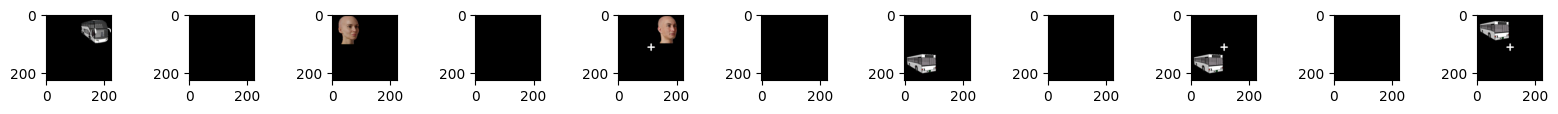

In [ ]:
import matplotlib.pyplot as plt
import os
import glob
import matplotlib.image as mpimg
import json
import sys
sys.path.append('/home/lucas/projects/iWISDM')

from iwisdm import make
import os
from copy import deepcopy
from numpy.random import choice 
from natsort import natsorted


stim_dir = '../shapenet_fmri_fixed'  # NOTE: Change this to ur path to shapenet_fmri_fixed

# Create environment
env = make(
    env_id='ShapeNet',
    dataset_fp=stim_dir,
)
# Initialize environment
print(env.env_spec.MAX_DELAY)

trial_dir = 'new_trials'  # NOTE: path to the directory containing the trials

ti = '0' # NOTE: trial index to visualize

images = []
for img_path in natsorted(glob.glob(trial_dir + f'/trial{ti}/frames/*.png')):
    images.append(mpimg.imread(img_path))


plt.figure(figsize=(20,11))
columns = 11
for i, image in enumerate(images):
    plt.subplot(len(images), columns, i + 1)
    plt.imshow(image)
with open(trial_dir + f'/trial{ti}/frames/task_info.json') as f:
    trial_info = json.load(f)
# print('merged tasks: ', trial_info['task_paths'])
print('instruction ', trial_info['instruction'])
print('answers: ', trial_info['answers'])